### Подключение библиотек и выбор датасета

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

Для выполнения данной лабораторной работы возьмём набор данных отзывов на вино:

In [211]:
data = pd.read_csv('../data/winemag.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Размеры выбранного набора:

In [14]:
data.shape

(150930, 11)

Типы колонок:

In [15]:
data.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

### 1. Обработка пропусков в данных

Проверим пропуски в данных:

In [18]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count > 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

country - object - 5
designation - object - 45735
price - float64 - 13695
province - object - 5
region_1 - object - 25060
region_2 - object - 89977


#### 1.1 Удаление пустых значений

Выполним удаление записей с пустыми значениями в столбце region_2:

In [28]:
data = data[data['region_2'].notna()]

Проверим размеры набора:

In [29]:
data.shape

(60953, 11)

#### 1.2 Заполнение нулями

Пропущенные значения в столбце price:

In [42]:
data[data['price'].isnull()].shape

(13695, 11)

Заполним пропуски нулями:

In [34]:
data['price'] = data['price'].fillna(0)

Проверим количество пропусков:

In [35]:
data[data['price'].isnull()].shape

(0, 11)

#### 1.3 Внедрение значений в числовых данных

Гистограмма для количественного признака price:

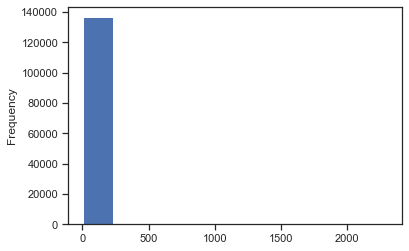

In [72]:
data['price'].plot.hist()

Количество пропусков:

In [73]:
data[data['price'].isnull()].shape

(13695, 11)

Посмотрим статистику:

In [74]:
data[['price']].describe()

,price
count,137235.000000
mean,33.131482
std,36.322536
min,4.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,2300.000000


Выполним импьютацию по трем стратегиям:

In [66]:
strategies=['mean', 'median','most_frequent']

##### *Среднее значение (mean):*

In [125]:
data['price'].describe()['mean']

33.13148249353299

Внедрение значений:

In [126]:
imp = SimpleImputer(strategy=strategies[0])
data['price'] = imp.fit_transform(data[['price']])
data['price']

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

##### *Медианное значение (median):*

In [128]:
imp = SimpleImputer(strategy=strategies[1])
data['price'] = imp.fit_transform(data[['price']])
data['price']

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

##### *Наиболее часто встречающееся значение (most_frequent):*

In [130]:
imp = SimpleImputer(strategy=strategies[2])
data['price'] = imp.fit_transform(data[['price']])
data['price']

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

#### 1.4 Внедрение значений в категориальных данных

Категориальные колонки с пропусками:

In [164]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        print('{} - {} - {}'.format(col, dt, temp_null_count))

country - object - 5
designation - object - 45735
province - object - 5
region_1 - object - 25060
region_2 - object - 89977


Выполним импьютацию наиболее частыми значениями в поле designation:

In [165]:
imp = SimpleImputer(strategy='most_frequent')
data['designation'] = imp.fit_transform(data[['designation']])

In [166]:
data['designation']

0                            Martha's Vineyard
1         Carodorum Selección Especial Reserva
2                Special Selected Late Harvest
3                                      Reserve
4                                   La Brûlade
                          ...                 
150925                                 Reserve
150926                          Cuvée Prestige
150927                           Terre di Dora
150928                         Grand Brut Rosé
150929                                 Reserve
Name: designation, Length: 150930, dtype: object

### 2. Кодирование категориальных признаков

Категориальные признаки:

In [135]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

country
description
designation
province
region_1
region_2
variety
winery


#### 2.1 Кодирование категорий целочисленными значениями

Категориальный признак winery, не имеющий пропусков:

In [173]:
data['winery'].unique()

array(['Heitz', 'Bodega Carmen Rodríguez', 'Macauley', ..., 'Screwed',
       'Red Bucket', 'White Knot'], dtype=object)

In [174]:
data[data['winery'].isnull()].shape

(0, 12)

Выполним кодирование:

In [175]:
le = LabelEncoder()
data['winery_enc'] = le.fit_transform(data['winery'])

In [176]:
data['winery_enc'].unique()

array([ 7286,  1231,  9032, ..., 12161, 11444, 14487])

Проверим значения:

In [178]:
le.inverse_transform([7286, 9032, 12161, 11444, 14487])

array(['Heitz', 'Macauley', 'Screwed', 'Red Bucket', 'White Knot'],
      dtype=object)

In [180]:
data[['winery','winery_enc']].head()

,winery,winery_enc
0,Heitz,7286
1,Bodega Carmen Rodríguez,1231
2,Macauley,9032
3,Ponzi,11001
4,Domaine de la Bégude,5409


#### 2.2. Кодирование категорий наборами бинарных значений

Категориальный признак variety, не имеющий пропусков:

In [181]:
data['variety'].unique()

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sangiovese', 'Sparkling Blend',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino',
       'Petite Sirah', 'Riesling', 'Cabernet Sauvignon-Syrah',
       'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Meritage', 'Baga',
       'Glera', 'Malbec-Merlot', 'Merlot-Malbec', 'Ugni Blanc-Colombard',
       'Viognier', 'Cabernet Sauvignon-Cabernet Franc', 'Moscato',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Monastrell',
       'Gamay', 'Zinfandel', 'Greco', 'Barbera', 'Grenache',
       'Rhône-style Red Blend', 'Albariño', 'Malvasia Bianca',
       'Assyrtiko', 'Malagouzia', 'Carmenère', 'Bordeaux-style Red Blend',
       'Touriga Nacional', 'Agiorgitiko', 'Picpoul', 'Godello',
       'Gewürztraminer', 'Merlot', 'Syrah-Grenache', 'G-S-M

Выполним кодирование:

In [186]:
ohe = OneHotEncoder()
variety_enc = ohe.fit_transform(data[['variety']])

In [187]:
variety_enc.shape

(150925, 632)

In [188]:
variety_enc.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [190]:
data['variety'].head(10)

0    Cabernet Sauvignon
1         Tinta de Toro
2       Sauvignon Blanc
3            Pinot Noir
4    Provence red blend
5         Tinta de Toro
6         Tinta de Toro
7         Tinta de Toro
8            Pinot Noir
9            Pinot Noir
Name: variety, dtype: object

#### 2.3 Pandas get_dummies

Выберем категориальный признак country:

In [199]:
pd.get_dummies(data['country']).head()

,Albania,Argentina,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,South Africa,South Korea,Spain,Switzerland,Tunisia,Turkey,US,US-France,Ukraine,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
pd.get_dummies(data['country'], dummy_na=True).head()

,Albania,Argentina,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,South Korea,Spain,Switzerland,Tunisia,Turkey,US,US-France,Ukraine,Uruguay,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Масштабирование данных

Выберем количественный признак points:

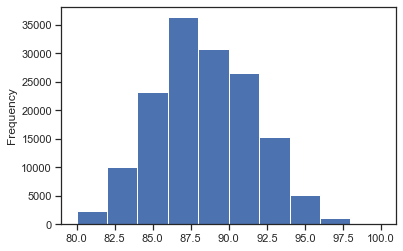

In [203]:
data['points'].plot.hist()

#### 3.1 MinMax масштабирование

Выполним масштабирование:

In [206]:
sc1 = MinMaxScaler()
data['points'] = sc1.fit_transform(data[['points']])

Проверим результат:

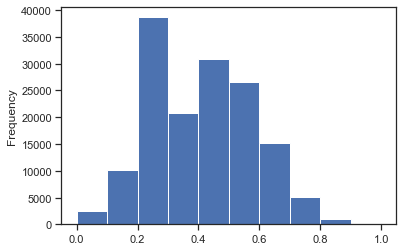

In [207]:
data['points'].plot.hist()

#### 3.2 Масштабирование данных на основе Z-оценки

Выполним масштабирование:

In [212]:
sc2 = StandardScaler()
data['points_Z'] = sc2.fit_transform(data[['points']])

Проверим результат:

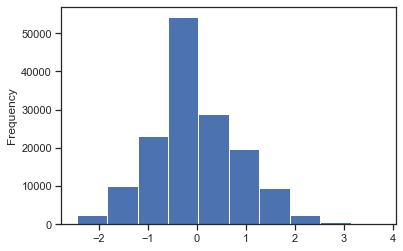

In [213]:
data['points_Z'].plot.hist()

#### 3.3 Нормализация данных

Выполним нормализацию:

In [214]:
sc3 = Normalizer()
data['points_N'] = sc3.fit_transform(data[['points_Z']])

Проверим результат:

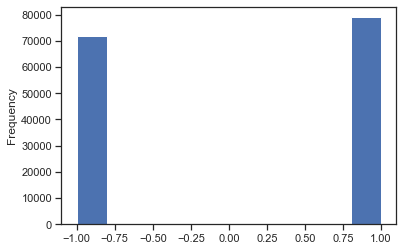

In [215]:
data['points_N'].plot.hist()